In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    """
    A simple Single Layer Perceptron model.
    """
    def __init__(self, learning_rate=0.1, n_epochs=100):
        """
        Initializes the Perceptron.
        
        Args:
            learning_rate (float): The step size for weight updates.
            n_epochs (int): The number of passes over the training dataset.
        """
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None
        self.weight_history = [] # To track changes for analysis

    def activation_function(self, x):
        """
        Step activation function.
        Returns 1 if x >= 0, else 0.
        """
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y, initial_weights=None):
        """
        Trains the perceptron on the given dataset.
        
        Args:
            X (np.array): Training vectors, shape = [n_samples, n_features]
            y (np.array): Target values, shape = [n_samples]
            initial_weights (np.array): Optional initial weights for deterministic results.
        """
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        if initial_weights is not None and len(initial_weights) == n_features:
            self.weights = np.array(initial_weights, dtype=float)
        else:
            # Random initialization
            self.weights = np.random.rand(n_features)
            
        self.bias = 0.0
        
        self.weight_history = []

        # Training loop
        for epoch in range(self.n_epochs):
            for idx, x_i in enumerate(X):
                # 1. Compute linear combination
                linear_output = np.dot(x_i, self.weights) + self.bias
                
                # 2. Apply activation function to get prediction
                y_predicted = self.activation_function(linear_output)
                
                # 3. Compute the error
                error = y[idx] - y_predicted
                
                # 4. Update weights and bias (Perceptron learning rule)
                update = self.learning_rate * error
                self.weights += update * x_i
                self.bias += update
            
            # Store weights and bias for this epoch for analysis
            self.weight_history.append((self.weights.copy(), self.bias))

    def predict(self, X):
        """
        Predicts the class label for the given input.
        """
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)

# AND Gate Data and Training

In [ ]:
# Dataset for AND gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Initialize and train the perceptron
# Using defined weights for reproducibility
print("--- Training AND Gate Perceptron ---")
perceptron_and = Perceptron(learning_rate=0.1, n_epochs=10)
perceptron_and.fit(X_and, y_and, initial_weights=[0.2, -0.75])

print(f"Final Weights: {perceptron_and.weights}")
print(f"Final Bias: {perceptron_and.bias:.2f}")

--- Training AND Gate Perceptron ---
Final Weights: [0.2  0.15]
Final Bias: -0.20


# AND Gate Testing

In [ ]:
print("\n--- Testing AND Gate ---")
for inputs, label in zip(X_and, y_and):
    prediction = perceptron_and.predict(inputs)
    print(f"Input: {inputs}, Actual: {label}, Predicted: {prediction}")


--- Testing AND Gate ---
Input: [0 0], Actual: 0, Predicted: 0
Input: [0 1], Actual: 0, Predicted: 0
Input: [1 0], Actual: 0, Predicted: 0
Input: [1 1], Actual: 1, Predicted: 1


# AND Gate Visualization


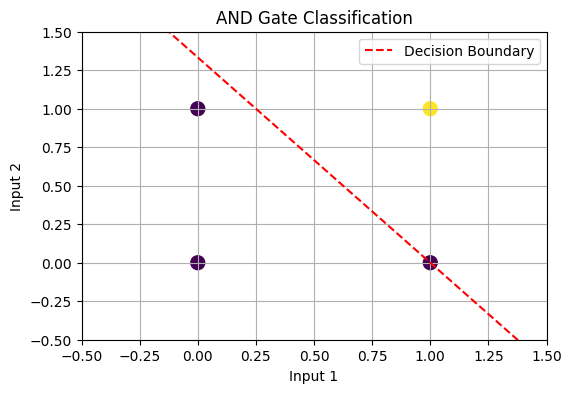

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(X_and[:, 0], X_and[:, 1], c=y_and, cmap='viridis', s=100)

# Plotting the decision boundary: w1*x1 + w2*x2 + b = 0
x1_min, x1_max = -0.5, 1.5
w1, w2 = perceptron_and.weights
b = perceptron_and.bias
# x2 = (-w1*x1 - b) / w2
x2_vals = (-w1 * np.array([x1_min, x1_max]) - b) / w2

plt.plot([x1_min, x1_max], x2_vals, 'r--', label='Decision Boundary')
plt.title("AND Gate Classification")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.xlim(x1_min, x1_max)
plt.ylim(x1_min, x1_max)
plt.legend()
plt.grid(True)
plt.show()

1. How do the weights and bias values change during training for the AND gate?
- The weights and bias are adjusted at each step where the model makes an incorrect prediction. The perceptron learning rule is: w_new = w_old + learning_rate * (target - prediction) * input.

    - If the model incorrectly predicts 0 when it should be 1 (e.g., for input [1, 1]), the error (1-0) is positive. This increases the weights and bias, pushing the decision boundary to correctly classify [1, 1] as 1.

    - If the model incorrectly predicts 1 when it should be 0, the error (0-1) is negative, which decreases the weights and bias.
    - Over several epochs, the weights converge to values that define a line separating the point (1, 1) from the other three points.

2. Can the perceptron successfully learn the AND logic with a linear decision boundary?
- Yes, absolutely. The AND gate is a linearly separable problem. As seen in the plot above, a single straight line can be drawn to separate the input combinations that result in 0 from the one that results in 1. The Single Layer Perceptron is designed precisely for such problems.

# OR Gate Implementation

In [ ]:
# Dataset for OR gate
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

# Initialize and train the perceptron
print("--- Training OR Gate Perceptron ---")
perceptron_or = Perceptron(learning_rate=0.1, n_epochs=10)
perceptron_or.fit(X_or, y_or) # Using random initial weights

print(f"Final Weights: {perceptron_or.weights}")
print(f"Final Bias: {perceptron_or.bias:.2f}")

# Testing
print("\n--- Testing OR Gate ---")
for inputs, label in zip(X_or, y_or):
    prediction = perceptron_or.predict(inputs)
    print(f"Input: {inputs}, Actual: {label}, Predicted: {prediction}")

--- Training OR Gate Perceptron ---
Final Weights: [0.10022452 0.44622379]
Final Bias: -0.10

--- Testing OR Gate ---
Input: [0 0], Actual: 0, Predicted: 0
Input: [0 1], Actual: 1, Predicted: 1
Input: [1 0], Actual: 1, Predicted: 1
Input: [1 1], Actual: 1, Predicted: 1


# OR Gate Visualization

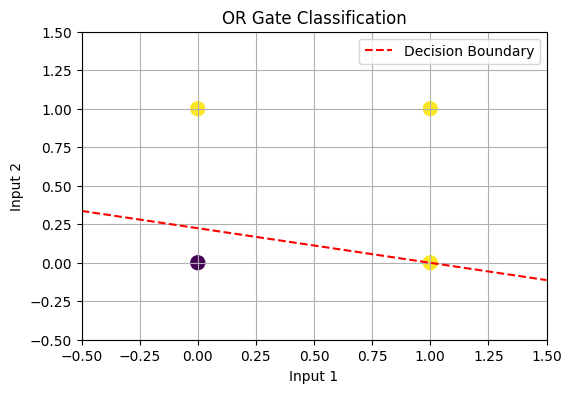

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(X_or[:, 0], X_or[:, 1], c=y_or, cmap='viridis', s=100)

x1_min, x1_max = -0.5, 1.5
w1, w2 = perceptron_or.weights
b = perceptron_or.bias
x2_vals = (-w1 * np.array([x1_min, x1_max]) - b) / w2

plt.plot([x1_min, x1_max], x2_vals, 'r--', label='Decision Boundary')
plt.title("OR Gate Classification")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.xlim(x1_min, x1_max)
plt.ylim(x1_min, x1_max)
plt.legend()
plt.grid(True)
plt.show()


1. What changes in the perceptron's weights are necessary to represent the OR gate logic?
- For the OR gate, both weights will converge to be positive. This is because the presence of a 1 in either input contributes positively towards the sum w1*x1 + w2*x2 + b. The bias will likely be a small negative number to ensure that the input [0, 0] results in a negative sum (outputting 0), while any other input results in a positive sum (outputting 1).

2. How does the linear decision boundary look for the OR gate classification?
- The linear decision boundary is a straight line that separates the point (0, 0) from the other three points (0, 1), (1, 0), and (1, 1). The region containing (0, 0) is the "0" class, and the region containing the other three points is the "1" class.



# AND-NOT Gate Implementation


In [ ]:
# Dataset for AND-NOT gate (Input1 AND NOT Input2)
X_and_not = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_not = np.array([0, 0, 1, 0])

# Initialize and train the perceptron
print("--- Training AND-NOT Gate Perceptron ---")
perceptron_and_not = Perceptron(learning_rate=0.1, n_epochs=20) # More epochs might be needed
perceptron_and_not.fit(X_and_not, y_and_not)

print(f"Final Weights: {perceptron_and_not.weights}")
print(f"Final Bias: {perceptron_and_not.bias:.2f}")

# Testing
print("\n--- Testing AND-NOT Gate ---")
for inputs, label in zip(X_and_not, y_and_not):
    prediction = perceptron_and_not.predict(inputs)
    print(f"Input: {inputs}, Actual: {label}, Predicted: {prediction}")

--- Training AND-NOT Gate Perceptron ---
Final Weights: [ 0.27749704 -0.26649222]
Final Bias: -0.10

--- Testing AND-NOT Gate ---
Input: [0 0], Actual: 0, Predicted: 0
Input: [0 1], Actual: 0, Predicted: 0
Input: [1 0], Actual: 1, Predicted: 1
Input: [1 1], Actual: 0, Predicted: 0


# AND-NOT Gate Visualization

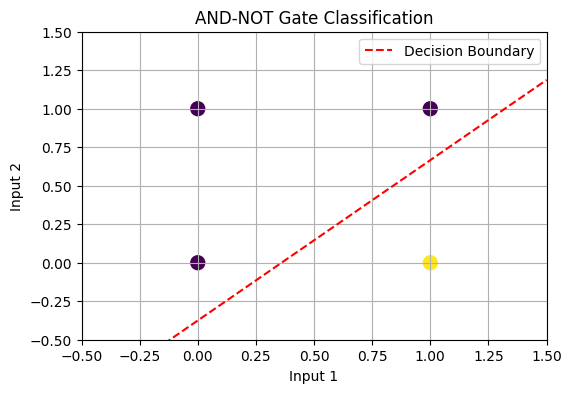

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(X_and_not[:, 0], X_and_not[:, 1], c=y_and_not, cmap='viridis', s=100)

x1_min, x1_max = -0.5, 1.5
w1, w2 = perceptron_and_not.weights
b = perceptron_and_not.bias
x2_vals = (-w1 * np.array([x1_min, x1_max]) - b) / w2

plt.plot([x1_min, x1_max], x2_vals, 'r--', label='Decision Boundary')
plt.title("AND-NOT Gate Classification")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.xlim(x1_min, x1_max)
plt.ylim(x1_min, x1_max)
plt.legend()
plt.grid(True)
plt.show()



1. What is the perceptron's weight configuration after training for the AND-NOT gate?
- After training, the weight for the first input (w1) will be positive, while the weight for the second input (w2) will be negative. This configuration rewards Input 1 being 1 and penalizes Input 2 being 1. The bias adjusts the threshold so that only the combination [1, 0] activates the neuron.

2. How does the perceptron handle cases where both inputs are 1 or 0?

    - For [1, 1]: The positive contribution from w1 * 1 is counteracted by the negative contribution from w2 * 1, causing the net sum to be less than the threshold, resulting in a 0 output.

    - For [0, 0]: With both inputs being zero, the net sum is just the bias, which will be tuned to be less than zero, resulting in a 0 output.

# XOR Gate Implementation Attempt

In [ ]:
# Dataset for XOR gate
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Initialize and train the perceptron
print("--- Attempting to Train XOR Gate Perceptron ---")
perceptron_xor = Perceptron(learning_rate=0.1, n_epochs=100)
perceptron_xor.fit(X_xor, y_xor)

print(f"Final Weights after 100 epochs: {perceptron_xor.weights}")
print(f"Final Bias after 100 epochs: {perceptron_xor.bias:.2f}")

# Testing
print("\n--- Testing XOR Gate ---")
correct_predictions = 0
for inputs, label in zip(X_xor, y_xor):
    prediction = perceptron_xor.predict(inputs)
    if prediction == label:
        correct_predictions += 1
    print(f"Input: {inputs}, Actual: {label}, Predicted: {prediction}")

print(f"\nAccuracy: {correct_predictions / len(X_xor) * 100}%")
print("Notice that the model cannot achieve 100% accuracy.")

--- Attempting to Train XOR Gate Perceptron ---
Final Weights after 100 epochs: [-0.15885193 -0.07158003]
Final Bias after 100 epochs: 0.10

--- Testing XOR Gate ---
Input: [0 0], Actual: 0, Predicted: 1
Input: [0 1], Actual: 1, Predicted: 1
Input: [1 0], Actual: 1, Predicted: 0
Input: [1 1], Actual: 0, Predicted: 0

Accuracy: 50.0%
Notice that the model cannot achieve 100% accuracy.


# XOR Gate Visualization


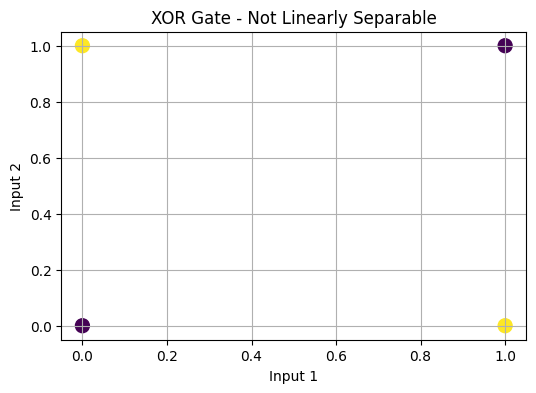

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, cmap='viridis', s=100)
plt.title("XOR Gate - Not Linearly Separable")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)
plt.show()


1. Why does the Single Layer Perceptron struggle to classify the XOR gate?
- A Single Layer Perceptron can only learn linear decision boundaries. As shown in the visualization, the data points for the XOR gate are not linearly separable. You cannot draw a single straight line to separate the points (0, 1) and (1, 0) (which should be class 1) from (0, 0) and (1, 1) (which should be class 0). The perceptron's training algorithm will never converge to a zero-error state; the decision boundary will keep shifting, unable to satisfy all four data points simultaneously.

2. What modifications can be made to the neural network model to handle the XOR gate correctly?
- To solve non-linearly separable problems like XOR, we need a more complex model. The solution is to use a Multi-Layer Perceptron (MLP). An MLP has one or more hidden layers between the input and output layers.

    - These hidden layers allow the network to learn complex, non-linear combinations of the input features.

    - In essence, a multi-layer network can create curved or multiple decision boundaries. An MLP can solve the XOR problem by combining the outputs of simpler gates (like AND, OR, and NAND) in its hidden layers to construct a non-linear decision surface in the final output layer.